In [1]:
import itertools

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from pomegranate import *

In [2]:
covid_policies_df = pd.read_csv("../data/processed/categorical_policies.csv")
covid_policies_df.set_index(["country", "date"], inplace=True)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 17)


school_closures  workplace_closures  cancel_public_events  \
country date                                                                    
china   2020-05-02                2                   1                     1   
        2020-05-03                2                   1                     1   
        2020-05-04                2                   1                     1   
        2020-05-05                2                   1                     1   
        2020-05-06                2                   1                     1   

                    restrict_public_gathering  closure_public_transport  \
country date                                                              
china   2020-05-02                          3                         0   
        2020-05-03                          3                         0   
        2020-05-04                          3                         0   
        2020-05-05                          3                         0   
        2020-05-06                          3                         0   

                    shn_requirement  restriction_internal_movement  \
country date                                                         
china   2020-05-02                0                              1   
        2020-05-03                0                              1   
        2020-05-04                0                              1   
        2020-05-05                0                              1   
        2020-05-06                0                              1   

                    internation_travel_control  pi_campaign  testing_policy  \
country date                                                                  
china   2020-05-02                         4.0            2             3.0   
        2020-05-03                         4.0            2             3.0   
        2020-05-04                         4.0            2             3.0   
        2020-05-05                         4.0            2             3.0   
        2020-05-06                         4.0            2             3.0   

                    contact_tracing  facial_covering  vaccine_policy  \
country date                                                           
china   2020-05-02              2.0                2               0   
        2020-05-03              2.0                2               0   
        2020-05-04              2.0                2               0   
        2020-05-05              2.0                2               0   
        2020-05-06              2.0                2               0   

                    confirmed_cases  confirmed_deathes  cases_per_mil  \
country date                                                            
china   2020-05-02            991.0                6.0       0.684392   
        2020-05-03            991.0                6.0       0.684392   
        2020-05-04            991.0                6.0       0.684392   
        2020-05-05            991.0                6.0       0.684392   
        2020-05-06            991.0                6.0       0.684392   

                    cases_per_mil_cat  
country date                           
china   2020-05-02                  0  
        2020-05-03                  0  
        2020-05-04                  0  
        2020-05-05                  0  
        2020-05-06                  0

In [3]:
sg_filtered = covid_policies_df.loc[
    "singapore",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]
sg_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,3219.816514,0,17548.0
2020-05-03,3,3,3340.366972,0,18205.0
2020-05-04,3,3,3445.504587,0,18778.0
2020-05-05,3,3,3561.467890,0,19410.0
2020-05-06,3,3,3706.055046,0,20198.0


In [4]:
ml_filtered = covid_policies_df.loc[
    "malaysia",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]

ml_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,193.00000,0,6176.0
2020-05-03,3,3,196.81250,0,6298.0
2020-05-04,3,2,198.53125,0,6353.0
2020-05-05,3,2,199.46875,0,6383.0
2020-05-06,3,2,200.87500,0,6428.0


<AxesSubplot:xlabel='cases_per_mil', ylabel='Count'>

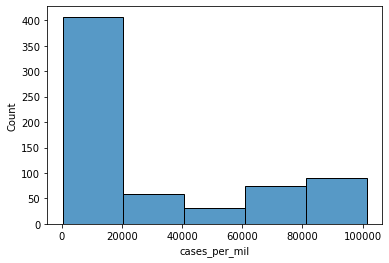

In [5]:
import seaborn as sns

sns.histplot(ml_filtered.cases_per_mil, bins=5)

## Contruct MRF with a subset of features

In [6]:
for column in ["school_closures", "workplace_closures", "cases_per_mil_cat"]:
    print(column, ml_filtered[column].unique())

school_closures [3 2 1 0]
workplace_closures [3 2 1]
cases_per_mil_cat [0 1 2 3 4 5]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork

In [8]:
covid_policies_df = pd.read_csv("../data/processed/categorical_policies.csv")
covid_policies_df.set_index(["country", "date"], inplace=True)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 17)


school_closures  workplace_closures  cancel_public_events  \
country date                                                                    
china   2020-05-02                2                   1                     1   
        2020-05-03                2                   1                     1   
        2020-05-04                2                   1                     1   
        2020-05-05                2                   1                     1   
        2020-05-06                2                   1                     1   

                    restrict_public_gathering  closure_public_transport  \
country date                                                              
china   2020-05-02                          3                         0   
        2020-05-03                          3                         0   
        2020-05-04                          3                         0   
        2020-05-05                          3                         0   
        2020-05-06                          3                         0   

                    shn_requirement  restriction_internal_movement  \
country date                                                         
china   2020-05-02                0                              1   
        2020-05-03                0                              1   
        2020-05-04                0                              1   
        2020-05-05                0                              1   
        2020-05-06                0                              1   

                    internation_travel_control  pi_campaign  testing_policy  \
country date                                                                  
china   2020-05-02                         4.0            2             3.0   
        2020-05-03                         4.0            2             3.0   
        2020-05-04                         4.0            2             3.0   
        2020-05-05                         4.0            2             3.0   
        2020-05-06                         4.0            2             3.0   

                    contact_tracing  facial_covering  vaccine_policy  \
country date                                                           
china   2020-05-02              2.0                2               0   
        2020-05-03              2.0                2               0   
        2020-05-04              2.0                2               0   
        2020-05-05              2.0                2               0   
        2020-05-06              2.0                2               0   

                    confirmed_cases  confirmed_deathes  cases_per_mil  \
country date                                                            
china   2020-05-02            991.0                6.0       0.684392   
        2020-05-03            991.0                6.0       0.684392   
        2020-05-04            991.0                6.0       0.684392   
        2020-05-05            991.0                6.0       0.684392   
        2020-05-06            991.0                6.0       0.684392   

                    cases_per_mil_cat  
country date                           
china   2020-05-02                  0  
        2020-05-03                  0  
        2020-05-04                  0  
        2020-05-05                  0  
        2020-05-06                  0

In [9]:
sg_filtered = covid_policies_df.loc[
    "singapore",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]
sg_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,3219.816514,0,17548.0
2020-05-03,3,3,3340.366972,0,18205.0
2020-05-04,3,3,3445.504587,0,18778.0
2020-05-05,3,3,3561.467890,0,19410.0
2020-05-06,3,3,3706.055046,0,20198.0


In [10]:
ml_filtered = covid_policies_df.loc[
    "malaysia",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]

ml_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,193.00000,0,6176.0
2020-05-03,3,3,196.81250,0,6298.0
2020-05-04,3,2,198.53125,0,6353.0
2020-05-05,3,2,199.46875,0,6383.0
2020-05-06,3,2,200.87500,0,6428.0


<AxesSubplot:xlabel='cases_per_mil', ylabel='Count'>

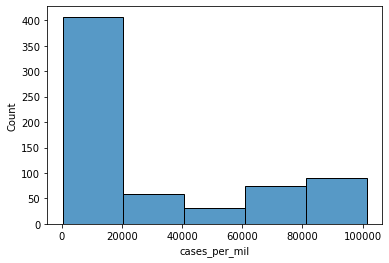

In [11]:
import seaborn as sns

sns.histplot(ml_filtered.cases_per_mil, bins=5)

In [12]:
for column in ["school_closures", "workplace_closures", "cases_per_mil_cat"]:
    print(column, ml_filtered[column].unique())

school_closures [3 2 1 0]
workplace_closures [3 2 1]
cases_per_mil_cat [0 1 2 3 4 5]


## Contruct MRF by-hand

In [13]:
nodes = ["school_closures", "workplace_closures", "cases_per_mil_cat"]
nodes_to_idx_map = {n: i for n, i in zip(nodes, range(len(nodes)))}
nodes_to_idx_map

{'school_closures': 0, 'workplace_closures': 1, 'cases_per_mil_cat': 2}

In [14]:
cliques = [
    ["school_closures", "workplace_closures"],
    ["workplace_closures", "cases_per_mil_cat"],
    ["school_closures", "cases_per_mil_cat"],
]
jpts = []
for clique in cliques:
    agg_results = ml_filtered.groupby(by=clique).size()
    records = []
    for val1, val2 in itertools.product(
        ml_filtered[clique[0]].unique(), ml_filtered[clique[1]].unique()
    ):
        records.append(
            [
                
                val1,
                val2,
                agg_results[(val1, val2)] if (val1, val2) in agg_results.index else 0,
            ]
        )
    jpts.append(JointProbabilityTable(records, (nodes_to_idx_map[clique[0]], nodes_to_idx_map[clique[1]]))) # Nodes are expected to be integers

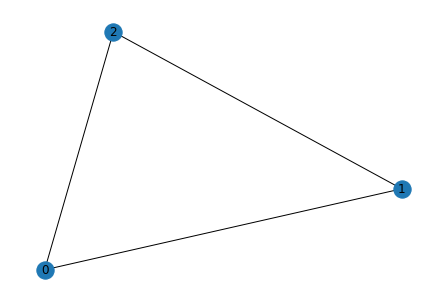

In [15]:
markov_model = MarkovNetwork(jpts)
markov_model.bake()
G = nx.Graph()
G.add_edges_from(markov_model.structure)
nx.draw(G, with_labels=True)

In [16]:
markov_model.predict_proba([[None, None, None]])

[array([{
            "class" : "Distribution",
            "dtype" : "numpy.int64",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "0" : 0.006986909331489476,
                    "1" : 0.00944566995200529,
                    "2" : 0.1807069585340459,
                    "3" : 0.8028604621824593
                }
            ],
            "frozen" : false
        }                                      ,
        {
            "class" : "Distribution",
            "dtype" : "numpy.int64",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "1" : 0.0492456817143833,
                    "2" : 0.5733092035699515,
                    "3" : 0.3774451147156653
                }
            ],
            "frozen" : false
        }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "numpy.int64",
            "name"

## Auto-learn MRF Structure from Data

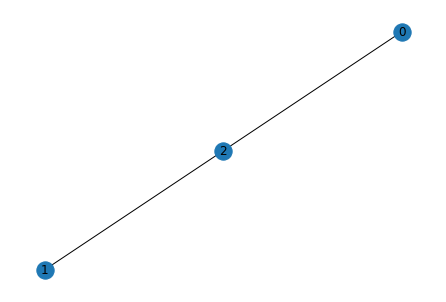

In [17]:
mrf_auto_model = MarkovNetwork.from_samples(
    ml_filtered[
        nodes
    ].to_numpy()
)
mrf_auto_model.bake()
G = nx.Graph()
G.add_edges_from(mrf_auto_model.structure)
nx.draw(G, with_labels=True)

In [19]:
mrf_auto_model.predict_proba([[None, None, None]])

[array([{
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "0" : 0.0399064243296745,
                    "1" : 0.07111750944754379,
                    "2" : 0.32903365125067474,
                    "3" : 0.5599424149721068
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "1" : 0.14656829224401668,
                    "2" : 0.45101313658448794,
                    "3" : 0.4024185711714954
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistributio

### Contruct MRF by-hand != Auto-learn MRF Structure from Data
